In [1]:
#Foodborne Disease Outbreaks, 1998-2000
#https://www.kaggle.com/cdc/foodborne-diseases
#Using the dataset from January 1998 to December 2000 to analyze what contaminant(Species) has been the major factor responsible
#for most illnesses.
#The original data consists of 19119 rows and 12 columns. I have taken 3999 rows for analysis which covers the period from
#January 1998 to December 2000


In [2]:
#Importing the csv from local folder to python
import pandas as pd
f=('outbreaks.csv')
out=pd.read_csv(f)

In [3]:
out.head(n=4)
#The column description are as follows:
#Year - Year when the disease outbreak occurred
#Month - Month when the disease outbreak occurred
#State - U.S State where the disease outbreak occurred
#Location - Location where the food was prepared
#Food - The food item which was contaminated
#Ingredient - Contaminated Ingredient
#Species - Pathogen/Toxic Substance causing the incontamination
#Serotype/Genotype - The type of Pathogen
#Status - Status whether the pathogen was cofirmed or not
#Illnesses - Number of illnesses caused
#Hospitalizations - Number of Hospitalizations caused
#Fatalities - Number of fatalities caused

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0


# Part A Cleaning and EDA (75 points)

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [5]:
# Data Cleaning

In [6]:
out.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [7]:
#1) Are there any missing values?


In [8]:
out.apply(lambda x: sum(x.isnull()), axis=0)
#There are missing values as we can see below in respective columns:

Year                    0
Month                   0
State                   0
Location              525
Food                 1487
Ingredient           3616
Species              2055
Serotype/Genotype    3448
Status               2055
Illnesses               0
Hospitalizations     1414
Fatalities           1425
dtype: int64

In [9]:
a=sum(out['Ingredient'].isnull())
print(a)
b=len(out['Ingredient'])
print(b)
(a/b)*100

3616
3999


90.422605651412852

In [10]:
c=sum(out['Serotype/Genotype'].isnull())
print(c)
d=len(out['Serotype/Genotype'])
print(d)
(c/d)*100

3448
3999


86.221555388847221

In [11]:
#Since the ratio of null fields in the column['Serotype/Genotype'] and ['Ingredient'] to the total number of rows exceeds 60%,
#they prove to be not much of help. Hence i am dropping those two columns for my analysis.

In [12]:
out1=out.copy()

In [13]:
#Dropping null values and deleting those two columns
out1.dropna(inplace=True)
del out1['Serotype/Genotype']
del out1['Ingredient']

In [14]:
out1.isnull().sum()

Year                0
Month               0
State               0
Location            0
Food                0
Species             0
Status              0
Illnesses           0
Hospitalizations    0
Fatalities          0
dtype: int64

In [15]:
# Are there any inappropriate values?

In [16]:
out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 638 to 3935
Data columns (total 10 columns):
Year                58 non-null int64
Month               58 non-null object
State               58 non-null object
Location            58 non-null object
Food                58 non-null object
Species             58 non-null object
Status              58 non-null object
Illnesses           58 non-null int64
Hospitalizations    58 non-null float64
Fatalities          58 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 5.0+ KB


In [17]:
out1.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,58.000000,58.000000,58.000000,58.000000
mean,1999.448276,38.568966,4.620690,0.017241
std,0.597434,56.515519,6.248726,0.131306
min,1998.000000,2.000000,0.000000,0.000000
25%,1999.000000,6.000000,0.000000,0.000000
50%,1999.500000,14.500000,2.000000,0.000000
75%,2000.000000,46.500000,6.000000,0.000000
max,2000.000000,258.000000,30.000000,1.000000


In [18]:
#There are no in appropriate values in the data set

In [19]:
#The current data in out1 is cleaned and does not require any imputing or removal.

In [20]:
#How is the data distributed


In [21]:
out1.head()

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
638,1998,June,New York,Private Home/Residence,"Chicken, Unspecified",Salmonella enterica,Confirmed,4,3.0,0.0
669,1998,July,Arizona,Restaurant,Chile Rellenos,Salmonella enterica,Confirmed,58,11.0,0.0
955,1998,September,Maryland,Restaurant,"Multiple Cheeses, Unspecified",Norovirus genogroup II,Confirmed,258,4.0,0.0
1319,1999,January,California,Restaurant,Eggs Benedict,Salmonella enterica,Confirmed,3,0.0,0.0
1321,1999,January,California,Restaurant,"Chile Relleno, Unspecified; Rice, Yellow",Salmonella enterica,Confirmed,31,6.0,0.0


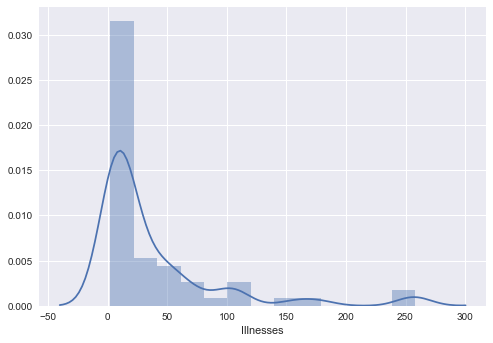

In [22]:
sns.distplot(out1['Illnesses'])
#The data is normally distributed from 2 to 50 after which we see an outlier value of  258

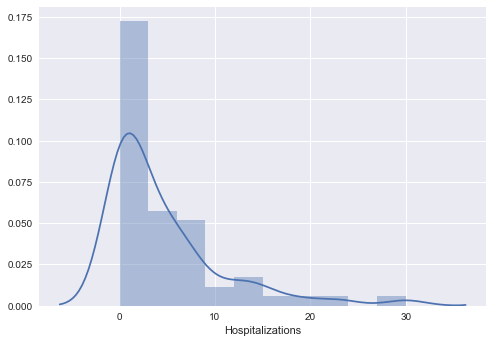

In [23]:
sns.distplot(out1['Hospitalizations'])
#The data is normally distributed between the values 0 to 8 after which we can see an outlier of 30

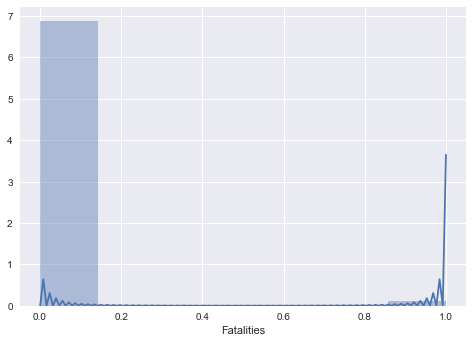

In [24]:
sns.distplot(out1['Fatalities'])
#The data density is mostly circulated around the value of 0. In this case, even value 1 is an outlier.

In [25]:
#What are the summary statistics
out1.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,58.000000,58.000000,58.000000,58.000000
mean,1999.448276,38.568966,4.620690,0.017241
std,0.597434,56.515519,6.248726,0.131306
min,1998.000000,2.000000,0.000000,0.000000
25%,1999.000000,6.000000,0.000000,0.000000
50%,1999.500000,14.500000,2.000000,0.000000
75%,2000.000000,46.500000,6.000000,0.000000
max,2000.000000,258.000000,30.000000,1.000000


In [26]:
#Plotting

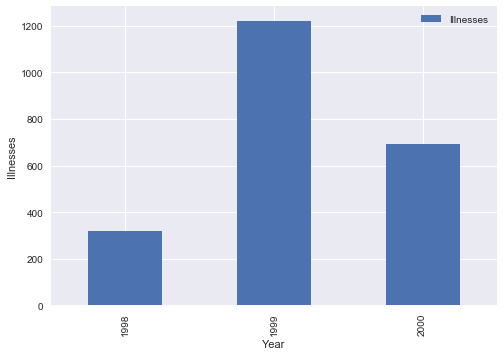

In [27]:
#With the data obtained from jan 1998 till December 2000, after dropping the null rows, the plot below shows the number of 
#illnesses in the three years. The maximum number of illnesses have occured in the year 1999 as we can see from the plot. 
year=out1[['Year','Illnesses']]
year_grp=year.groupby('Year')
year_totals=year_grp.sum()
year_fat_plot = year_totals.plot(kind='bar')


year_fat_plot.set_xlabel("Year")
year_fat_plot.set_ylabel("Illnesses")

In [28]:
out1['Illnesses'].mean()

38.56896551724138

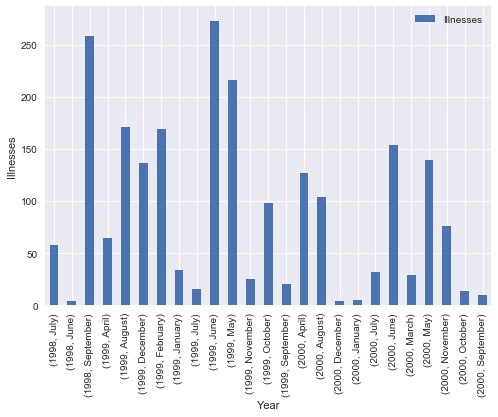

In [29]:
#Grouping the data monthwise and yearwise, we found from above that in the year 1999, the total number of illnesses cases were a
# bit over 1200. In this plot, 7 months(Feb,Apr,May,June,Aug,Oct,Dec) in 1999 are above the mean value(38.56) for illnesses 
#which makes us investigate the kind of food that was circulated in the months during 1999.
year_m=out1[['Year', 'Month', 'Illnesses']]
year_mg=year_m.groupby(['Year', 'Month'])
year_mg_total=year_mg.sum()
year_mg_plot = year_mg_total.plot(kind='bar')


year_mg_plot.set_xlabel("Year")
year_mg_plot.set_ylabel("Illnesses")
plt.rcParams['figure.figsize'] = (40,28)

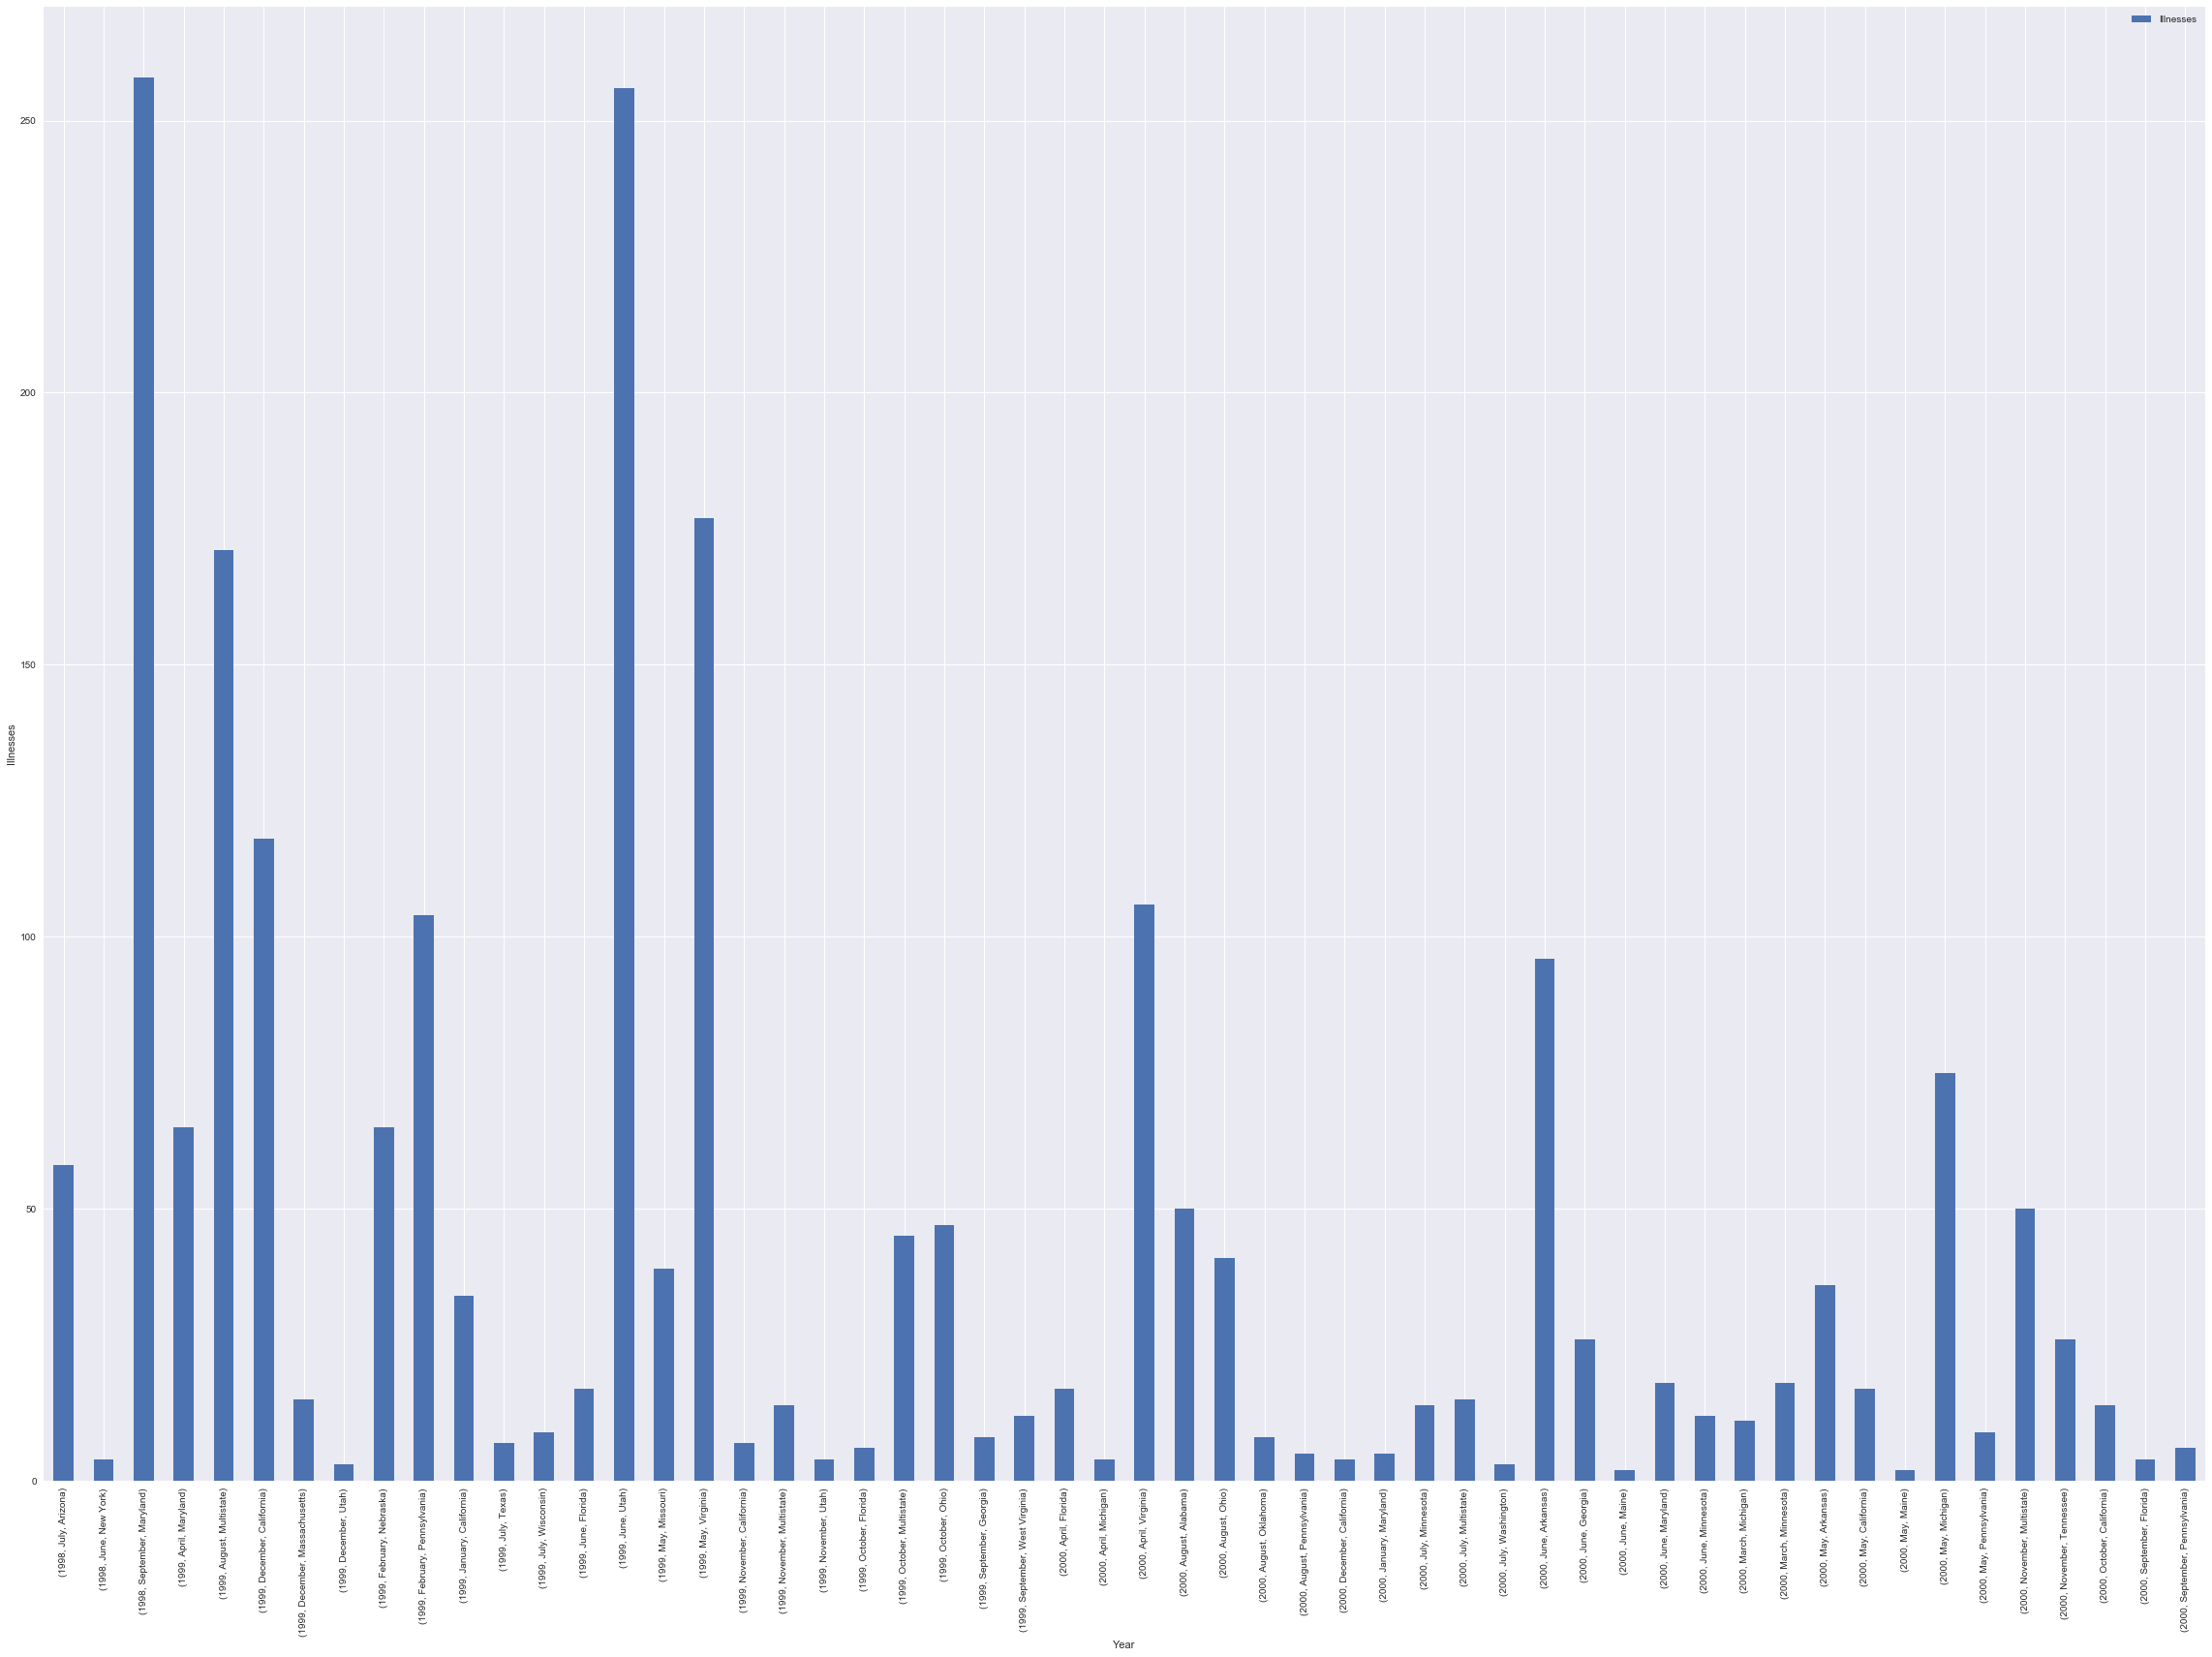

In [30]:
#Another approach to check whether the period 1999 is the cuplrit period 
#From the underlying plot, we can see the metrics of the number of cases of ill people state, year and month wise which tells us that 
#the entire distribution of 1999 (statewise) stand out with illness cases in Utah in June '99 being the maximum.
#This makes us want to investigate the food people consumed in these states during that time.
year_ms=out1[['Year','State', 'Month', 'Illnesses']]
year_mgs=year_ms.groupby(['Year', 'Month','State'])
year_mgs_total=year_mgs.sum()
year_mgs_plot = year_mgs_total.plot(kind='bar')


year_mgs_plot.set_xlabel("Year")
year_mgs_plot.set_ylabel("Illnesses")
plt.rcParams['figure.figsize'] = (20,8)
                            



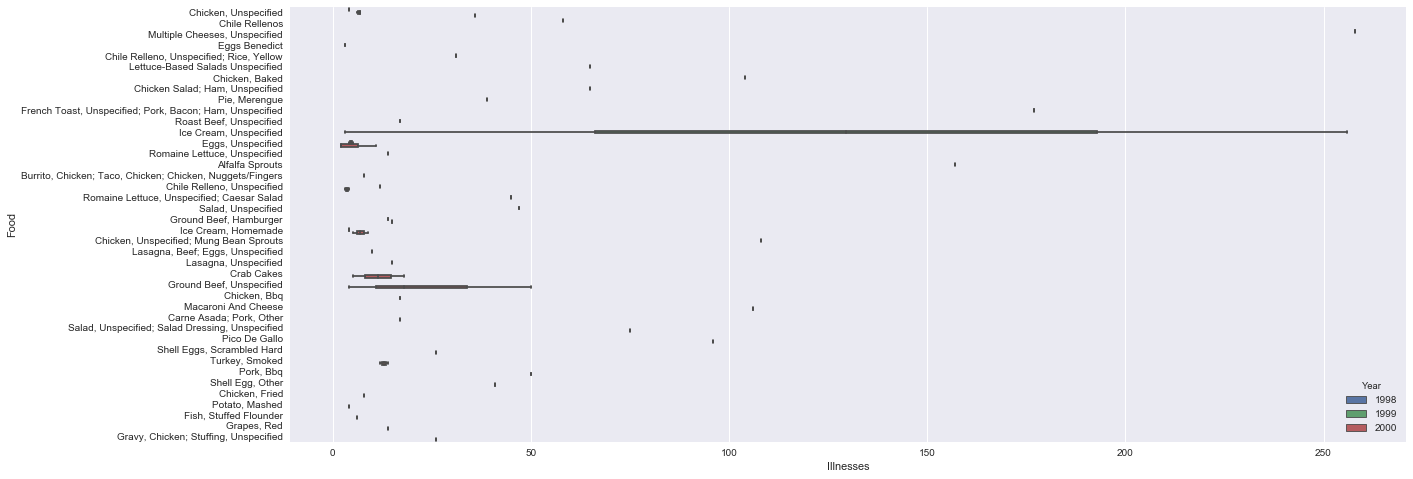

In [33]:
#This box plot shows us that the food 'Ice Cream" covers a large part of the illnesses value range
#which occurred during the year 1999 which shows it is the standing out food item amongst the others. It goes to say that 75% of the
#illnesses values lie within the range of this food item which is a strong indication to go ahead with this food item.
#We can analyse the specie of the contaminant in this food item that was responsible for the high number of illnesses.
sns.boxplot(x="Illnesses", y="Food", hue="Year", data=out1)
plt.rcParams['figure.figsize'] = (40, 28)

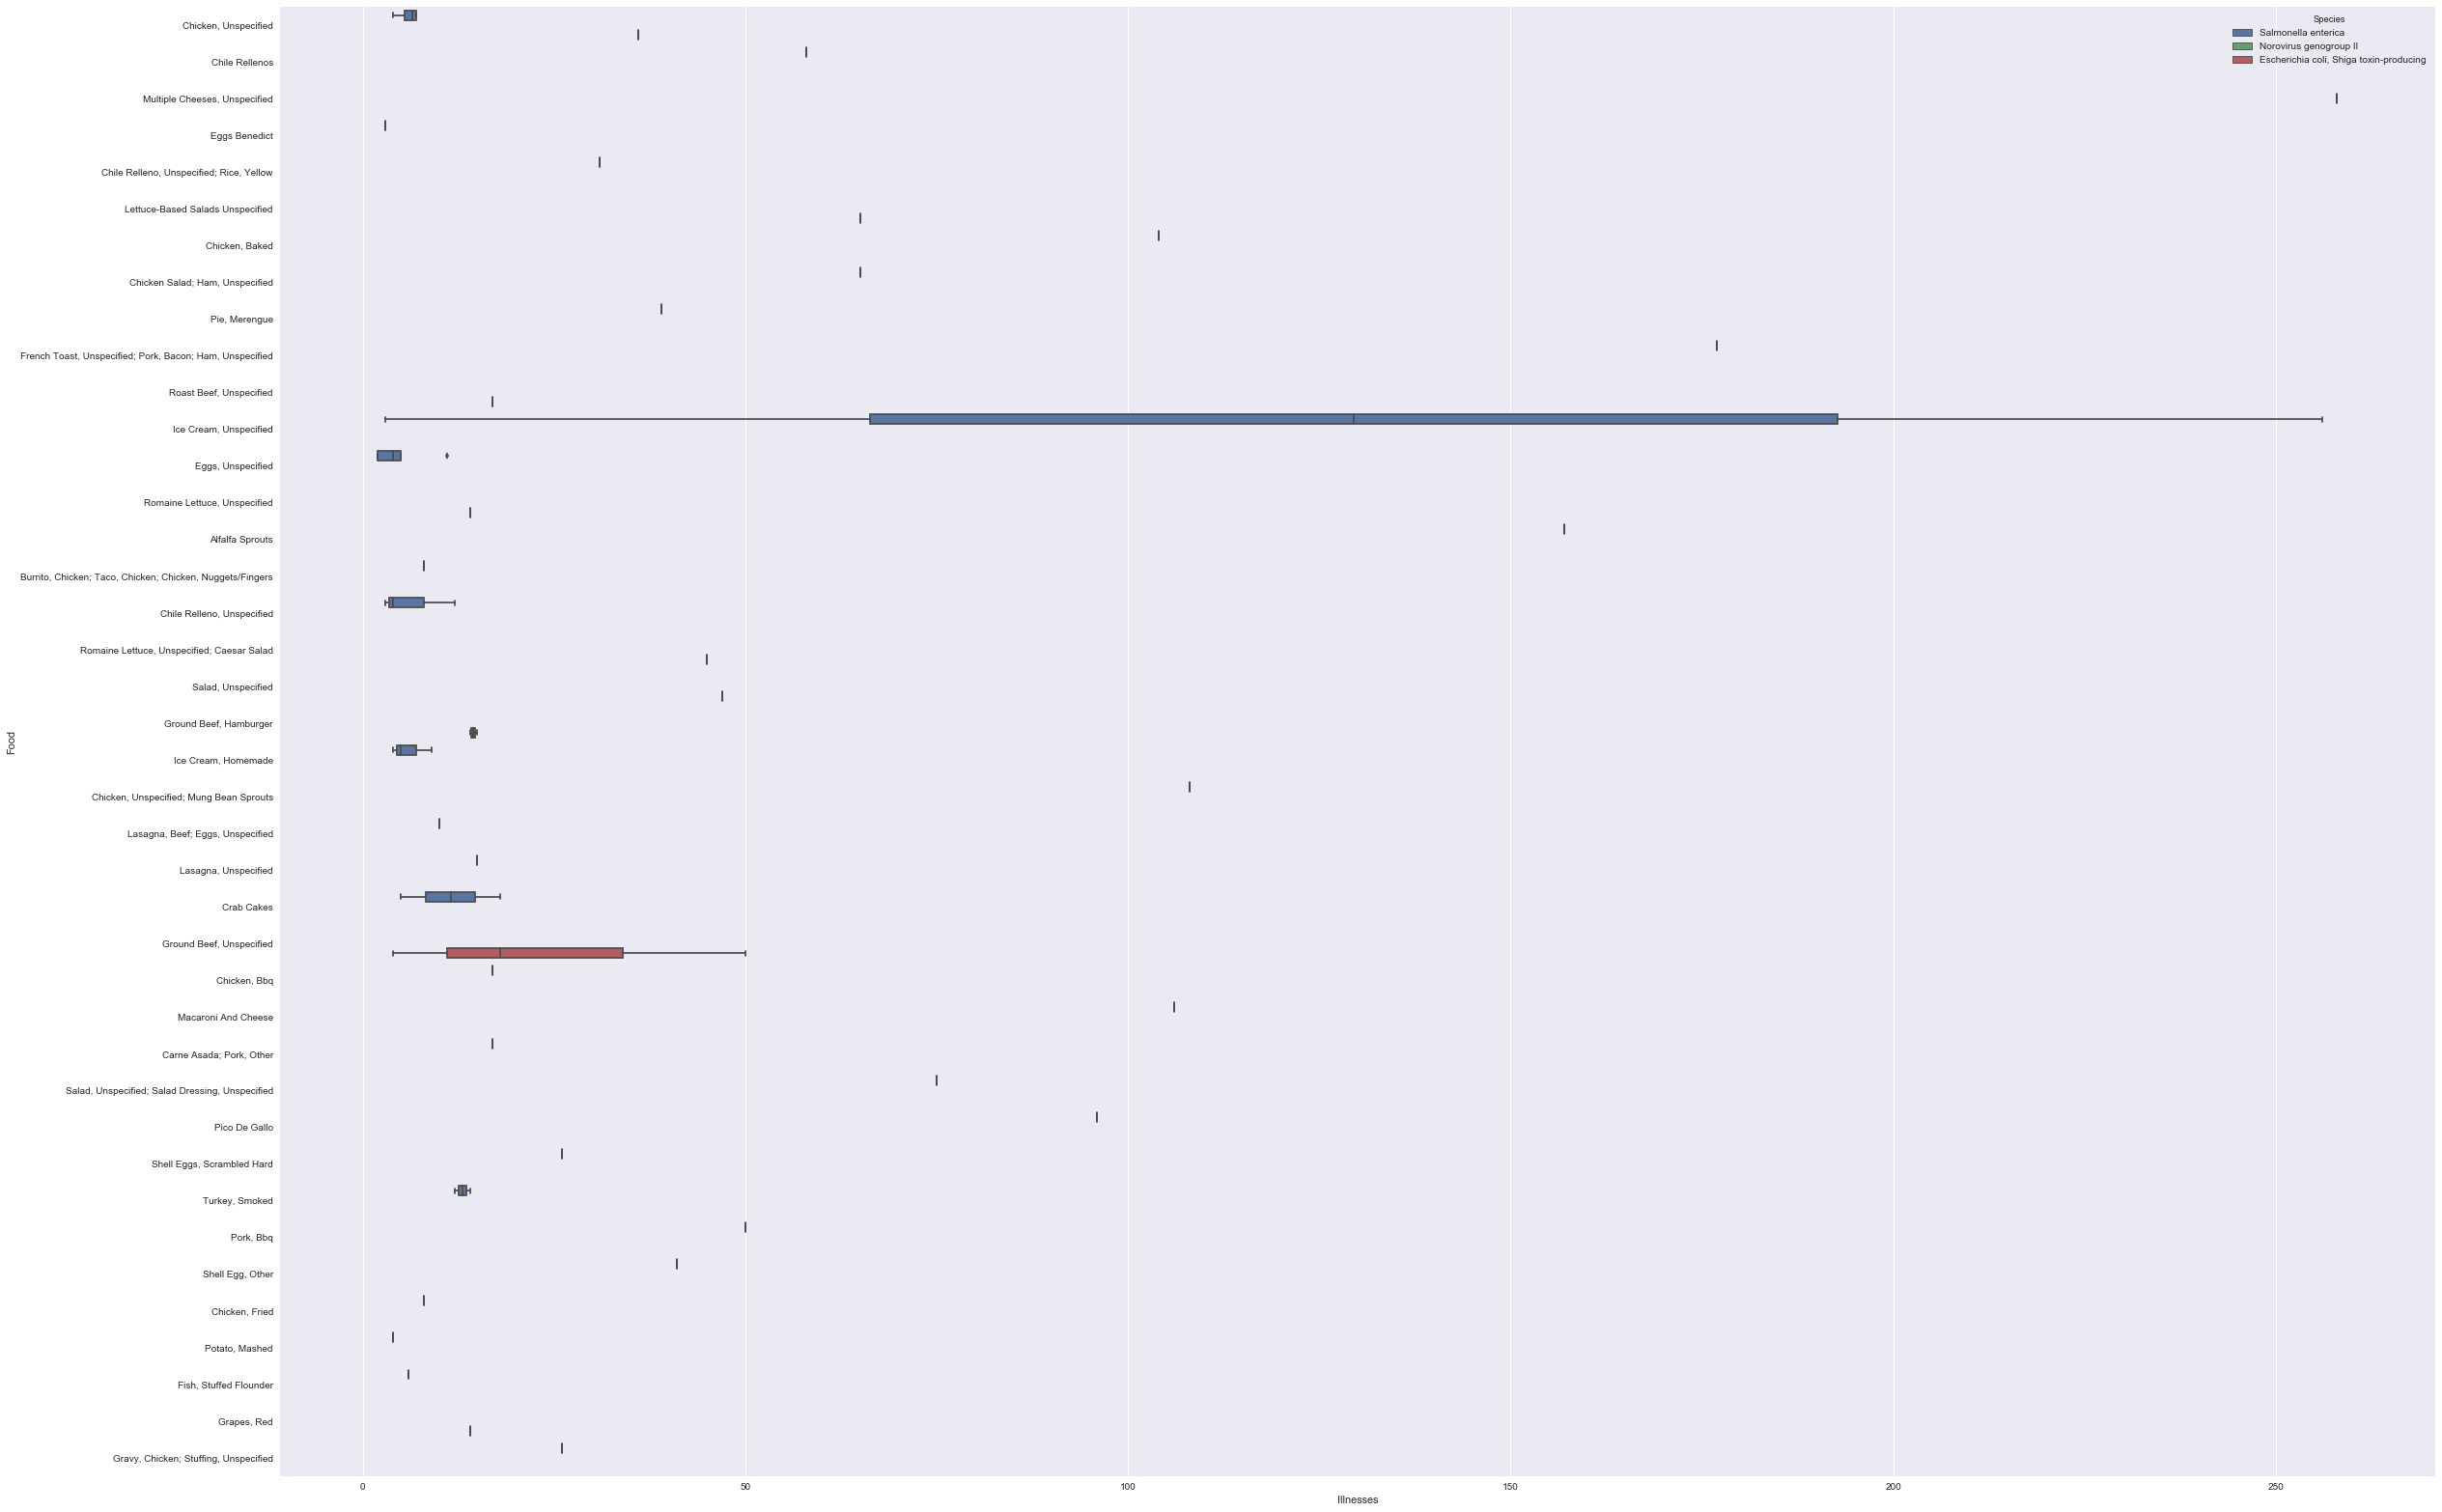

In [34]:
#As we can see in this box plot, the major specie which results in the causation of 259  cases of illnesses in the year 1999 is
#"Salmonella enterica"
sns.boxplot(x="Illnesses", y="Food", hue="Species", data=out1)
plt.rcParams['figure.figsize'] = (50, 11)

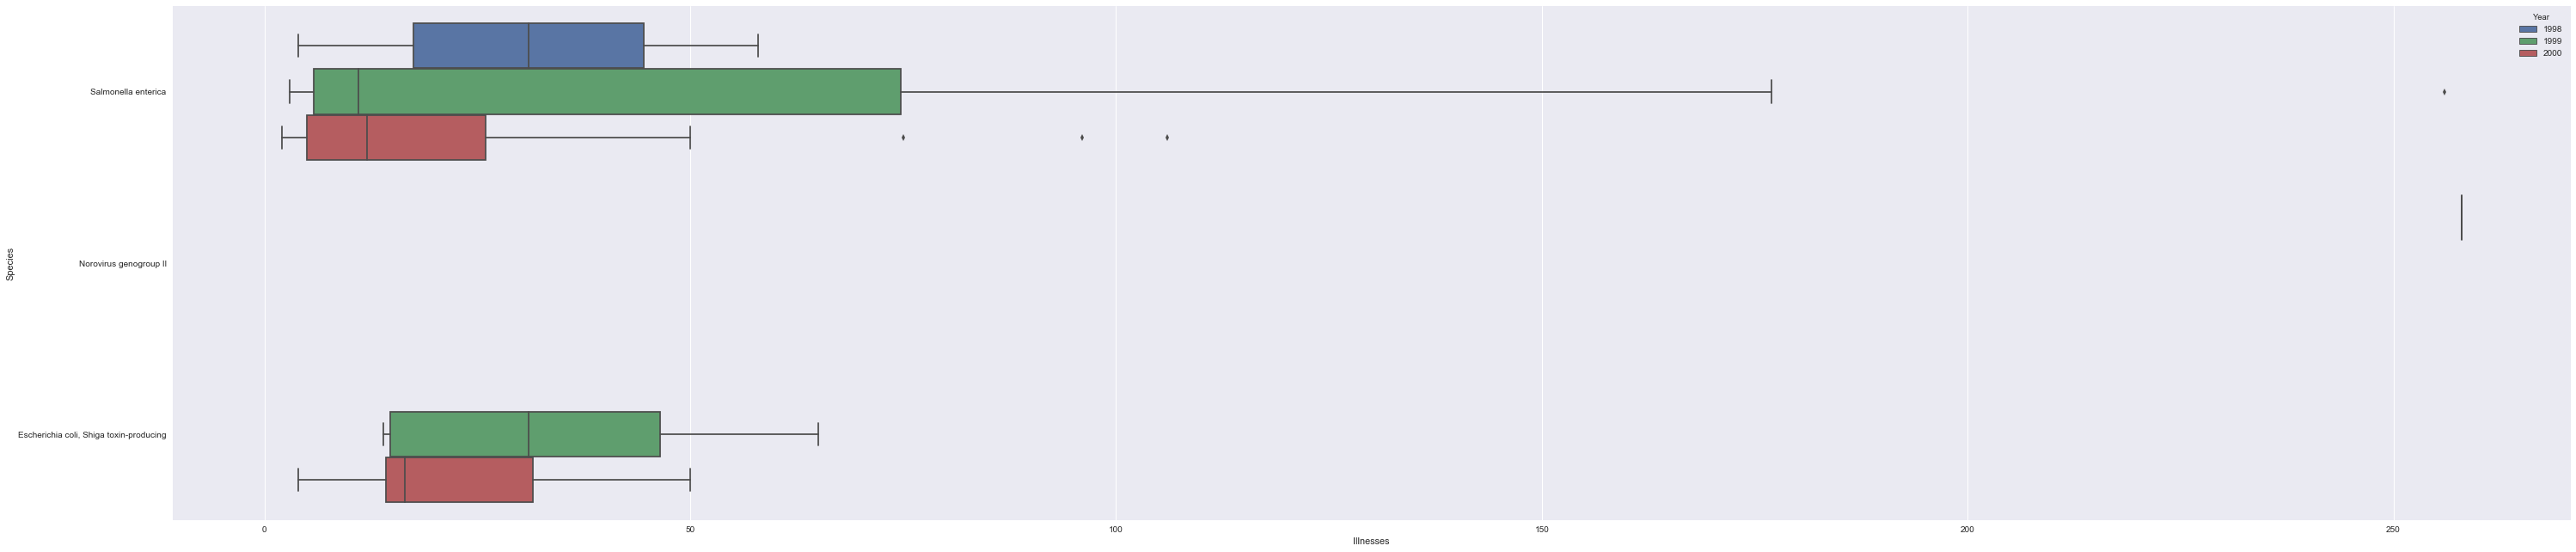

In [35]:
#This boxplot also shows the effect of the Specie "Salmonella Enterica" had on the number of cases of illnesses during 1999.
# This boxplot also has an outlier which is a strong indication that food items contaminated by this pathogen resulted in
#very high number of illnesses.
#The highest value for illnesses is by the Specie "Norovirus genogroup II" but it's impact was in 1998 where the number of 
#illnesses case were not as high as they were in 1999 which can be referred from the first grapgh.
sns.boxplot(x="Illnesses", y="Species", hue="Year", data=out1)
plt.rcParams['figure.figsize'] = (40, 25)

In [ ]:
#Correlation

                  Illnesses  Fatalities  Hospitalizations
Illnesses          1.000000   -0.081726          0.271070
Fatalities        -0.081726    1.000000         -0.056035
Hospitalizations   0.271070   -0.056035          1.000000


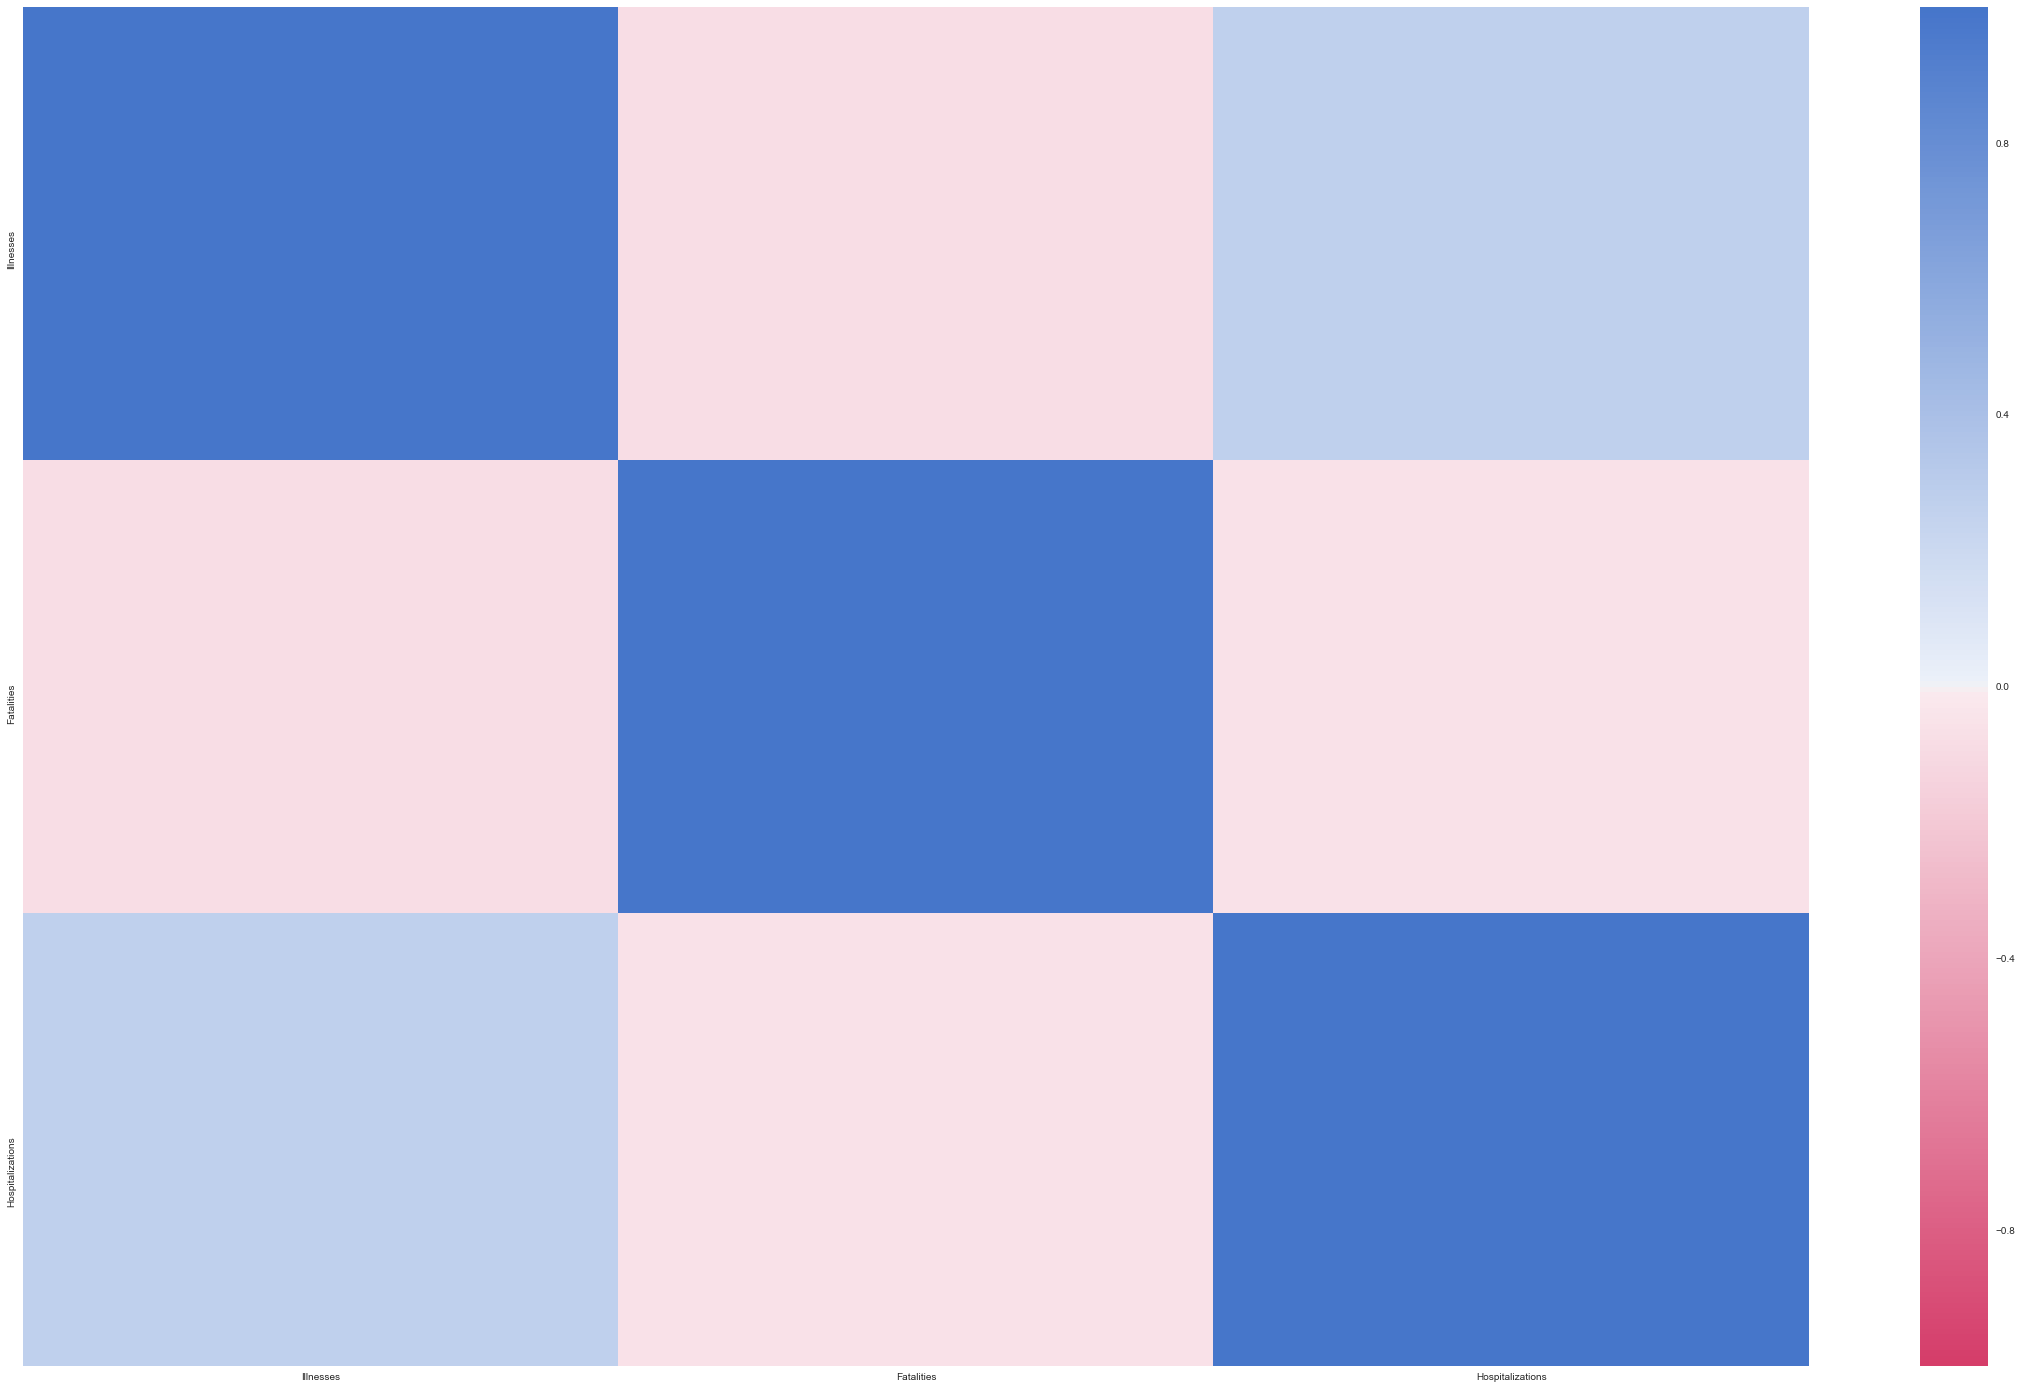

In [36]:
#The heatmap shows negative correlation between Fatalities and Illnesses, Fatalities and Hospitalizations. There is a positive 
#correlation between Hospitalizations and Illnesses but the coefficient of correlation is too small to be able to establish
#a linear equation to understand their relationship.
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = out1[['Illnesses', 'Fatalities', 'Hospitalizations']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
#Finally to answer the question.
#Which contaminant has been responsible for causing the most illnesses?
#The answer has been derived by finding out the maximum cases of illnesses year wise which resulted into finding out the food item
# that was circulated to states in the US. "Ice-cream" food item was a solid indicator as it had a huge spread over the cases
#of illnesses which led into the investigation of the pathogen which contaminated it. As a result of that, the pathogen/specie
#"Salmonella Enterica" is the culprit behind causing a lot of illnesses. As a result, food items containing this pathogen also led 
#to a cause of illness.


In [243]:
#The kind of data that would be required to enchance the prediction problem would be in the form of more co-related data which 
#would act as random variables in the dataset itself to check for causality of an outbreak of a disease due to a pathogen which
# woud help in predicting the questions asked out of this model.
